In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [169]:
new_df = df.drop(["PassengerId","Name","SibSp", "Parch","Ticket","Cabin","Embarked"], axis=1)
new_df.head(5)
new_df['Survived'].sum()

342

In [10]:
survival_count = new_df['Survived'].sum()

In [21]:
new_df[['Gender',"Survived"]].groupby("Gender").value_counts() # Survival Based on Gender

Gender  Survived
female  1           233
        0            81
male    0           468
        1           109
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

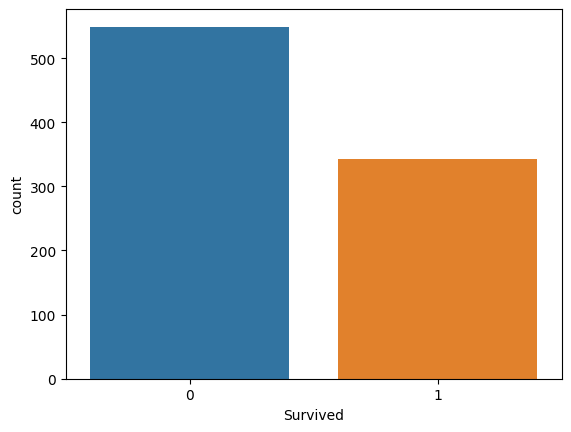

In [22]:
# survival plot
sns.countplot(x=new_df['Survived'])

In [25]:
new_df[['Pclass',"Survived"]].groupby("Pclass").value_counts() # Survival Based on Gender

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [123]:
piv = pd.pivot_table(new_df, values=['Survived'],index=['Gender'], columns=['Pclass'] ,aggfunc={"Survived":np.sum})
# piv_precent = piv.T.apply(lambda X: X / X.sum()).T
piv_precent = piv / new_df["Survived"].sum()

<Axes: ylabel='Gender'>

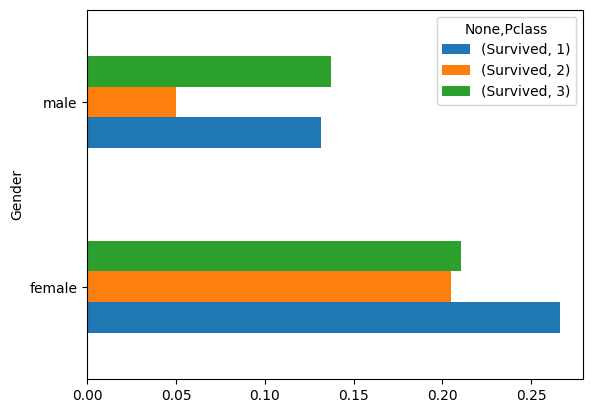

In [124]:
piv_precent.plot.barh()


In [175]:
temp_df = new_df.drop(["Age"],axis=1)
temp_df


,Pclass,Gender,Fare,Survived
0,3,male,7.2500,0
1,1,female,71.2833,1
2,3,female,7.9250,1
3,1,female,53.1000,1
4,3,male,8.0500,0
...,...,...,...,...
886,2,male,13.0000,0
887,1,female,30.0000,1
888,3,female,23.4500,0
889,1,male,30.0000,1


In [178]:
temp_df["DisAge"] = pd.cut(new_df["Age"], [0,18,36,54,72,90])
temp_df["DisAge"]

0      (18.0, 36.0]
1      (36.0, 54.0]
2      (18.0, 36.0]
3      (18.0, 36.0]
4      (18.0, 36.0]
           ...     
886    (18.0, 36.0]
887    (18.0, 36.0]
888             NaN
889    (18.0, 36.0]
890    (18.0, 36.0]
Name: DisAge, Length: 891, dtype: category
Categories (5, interval[int64, right]): [(0, 18] < (18, 36] < (36, 54] < (54, 72] < (72, 90]]

In [196]:
pd.pivot_table(temp_df, values=["Survived"], index=["DisAge","Gender"], columns=["Pclass"], aggfunc=np.sum)

Survived        
Pclass                 1   2   3
DisAge   Gender                 
(0, 18]  female       10  14  22
         male          4   9  11
(18, 36] female       38  40  23
         male         19   4  24
(36, 54] female       27  13   1
         male         14   1   3
(54, 72] female        7   1   1
         male          2   1   0
(72, 90] female        0   0   0
         male          1   0   0

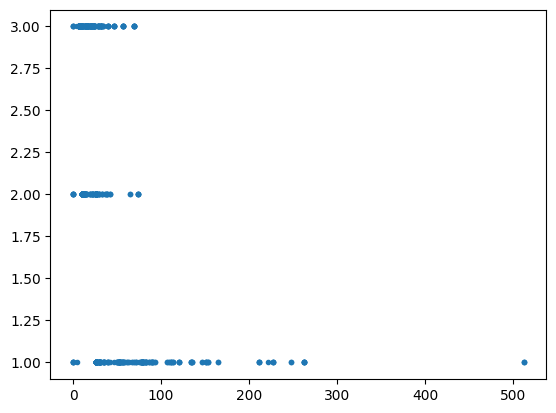

In [209]:
plt.plot(new_df["Fare"], new_df["Pclass"], ".")

In [213]:
pClass = new_df["Pclass"]
new_df.drop("Pclass",axis=1,inplace=True)

In [215]:
new_df.head()

,Gender,Age,Fare,Survived
0,male,22.0,7.2500,0
1,female,38.0,71.2833,1
2,female,26.0,7.9250,1
3,female,35.0,53.1000,1
4,male,35.0,8.0500,0


In [222]:
num_df = pd.get_dummies(new_df)

In [223]:
num_df.describe()

,Age,Fare,Survived,Gender_female,Gender_male
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.383838,0.352413,0.647587
std,14.526497,49.693429,0.486592,0.477990,0.477990
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,1.000000
75%,38.000000,31.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000


In [229]:
num_df.fillna(num_df["Age"].mean(), inplace=True)
num_df.describe()

,Age,Fare,Survived,Gender_female,Gender_male
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.383838,0.352413,0.647587
std,13.002015,49.693429,0.486592,0.477990,0.477990
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000
50%,29.699118,14.454200,0.000000,0.000000,1.000000
75%,35.000000,31.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000


<Axes: >

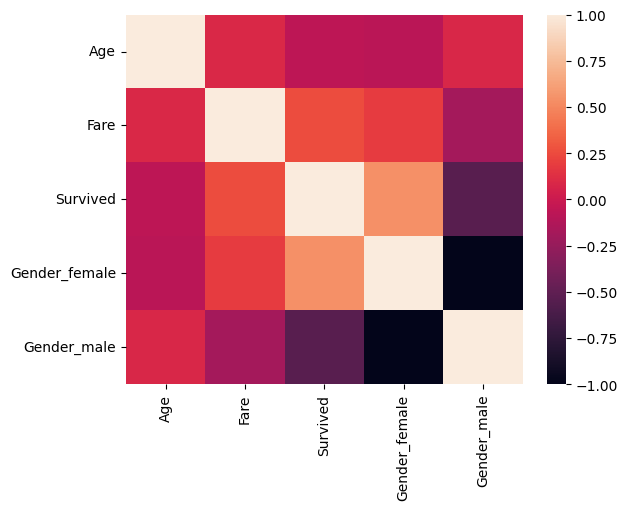

In [239]:
sns.heatmap(num_df.corr())

<Axes: ylabel='Count'>

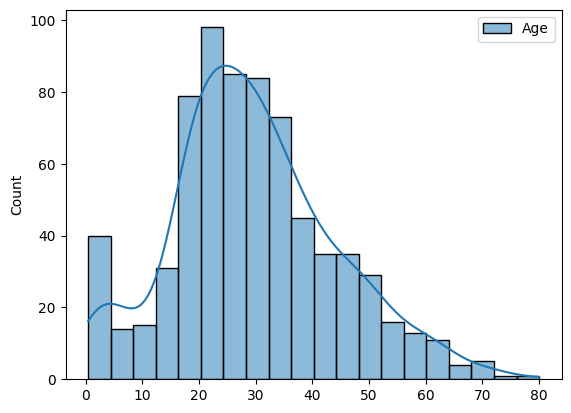

In [269]:
# fig = plt.figure()
sns.histplot(new_df[["Age"]], kde=True)


<Axes: ylabel='Count'>

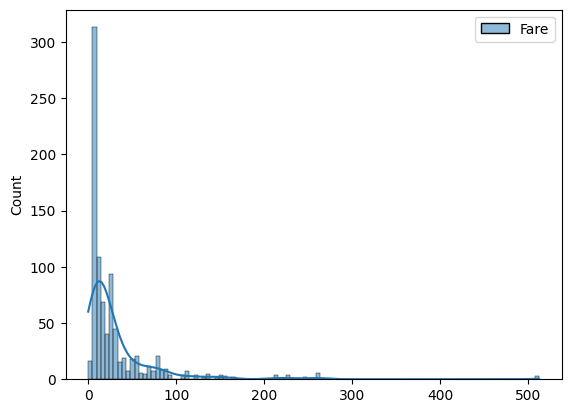

In [268]:
sns.histplot((new_df[["Fare"]]), kde=True)

In [281]:
X = num_df.drop("Survived", axis=1)
y = num_df["Survived"]

X = StandardScaler().fit_transform(X)

In [282]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
x_train.shape ,x_test.shape, y_train.shape, y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [283]:
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [286]:
clf.score(x_train, y_train), clf.score(x_test, y_test)

(0.7752808988764045, 0.8100558659217877)

In [315]:
y_pred_prob = clf.predict_proba(x_test[:10, :])
y_pred = clf.predict(x_test[:10, :])

In [297]:
print(classification_report(y_test[:10], y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.33      0.50      0.40         2

    accuracy                           0.70        10
   macro avg       0.60      0.62      0.60        10
weighted avg       0.75      0.70      0.72        10



In [316]:
pd.DataFrame(data=[y_pred, y_test[:10]],index=["Predicted", "Ground Truth"]).T

,Predicted,Ground Truth
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,1,0
9,0,0


In [313]:
y_pred

array([[0.03003572, 0.96996428],
       [0.97879985, 0.02120015],
       [0.0469002 , 0.9530998 ],
       [0.97604676, 0.02395324],
       [0.97771252, 0.02228748],
       [0.97469664, 0.02530336],
       [0.97837706, 0.02162294],
       [0.97837304, 0.02162696],
       [0.40558716, 0.59441284],
       [0.97913311, 0.02086689]])

In [318]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.76      0.72      0.74        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [322]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[97, 15],
       [19, 48]])

<Axes: >

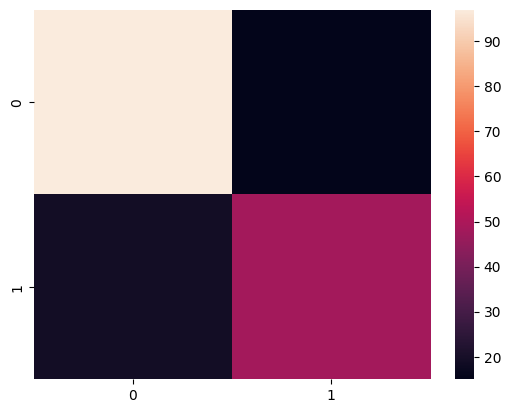

In [323]:
sns.heatmap(conf_mat)

# Categorical Classification

In [353]:
dis_age = pd.qcut(new_df['Age'].fillna(new_df["Age"].mean()),4)
dis_fare = pd.qcut(new_df['Fare'], 4)
dis_age.value_counts(), dis_fare.value_counts()

((22.0, 29.699]    330
 (0.419, 22.0]     231
 (35.0, 80.0]      217
 (29.699, 35.0]    113
 Name: Age, dtype: int64,
 (7.91, 14.454]     224
 (-0.001, 7.91]     223
 (14.454, 31.0]     222
 (31.0, 512.329]    222
 Name: Fare, dtype: int64)

In [360]:

X = new_df.drop(["Age", "Fare", "Survived"], axis=1)
X["Age"] = dis_age
X["Fare"] = dis_fare
X = pd.get_dummies(X)
X

,Gender_female,Gender_male,"Age_(0.419, 22.0]","Age_(22.0, 29.699]","Age_(29.699, 35.0]","Age_(35.0, 80.0]","Fare_(-0.001, 7.91]","Fare_(7.91, 14.454]","Fare_(14.454, 31.0]","Fare_(31.0, 512.329]"
0,0,1,1,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,1,0,0
887,1,0,1,0,0,0,0,0,1,0
888,1,0,0,1,0,0,0,0,1,0
889,0,1,0,1,0,0,0,0,1,0


In [361]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
x_train.shape ,x_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [362]:
clf = CategoricalNB()
clf.fit(x_train, y_train)

CategoricalNB()

In [363]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       112
           1       0.81      0.70      0.75        67

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



[[101  11]
 [ 20  47]]


<Axes: >

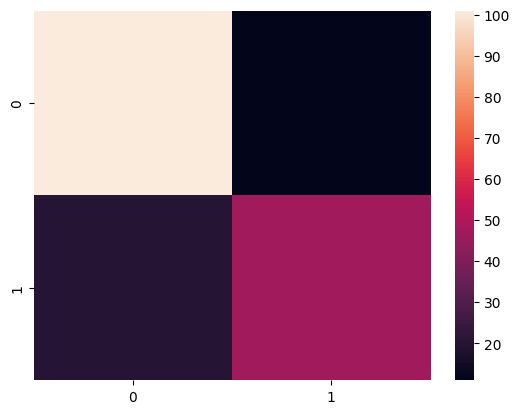

In [364]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
sns.heatmap(conf_mat)

## Equal Width binning

In [376]:
dis_age = pd.cut(new_df['Age'].fillna(new_df["Age"].mean()),[0,20,40,60,80])
dis_fare = pd.cut(new_df['Fare'], [0,100,200,300,400,500,600])
dis_age.value_counts(), dis_fare.value_counts()

((20, 40]    562
 (0, 20]     179
 (40, 60]    128
 (60, 80]     22
 Name: Age, dtype: int64,
 (0, 100]      823
 (100, 200]     33
 (200, 300]     17
 (500, 600]      3
 (300, 400]      0
 (400, 500]      0
 Name: Fare, dtype: int64)

In [369]:

X = new_df.drop(["Age", "Fare", "Survived"], axis=1)
X["Age"] = dis_age
X["Fare"] = dis_fare
X = pd.get_dummies(X)
X

,Gender_female,Gender_male,"Age_(0, 20]","Age_(20, 40]","Age_(40, 60]","Age_(60, 80]","Fare_(0, 100]","Fare_(100, 200]","Fare_(200, 300]","Fare_(300, 400]","Fare_(400, 500]","Fare_(500, 600]"
0,0,1,0,1,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,1,0,0,0,0,0
887,1,0,1,0,0,0,1,0,0,0,0,0
888,1,0,0,1,0,0,1,0,0,0,0,0
889,0,1,0,1,0,0,1,0,0,0,0,0


In [370]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
x_train.shape ,x_test.shape, y_train.shape, y_test.shape

((712, 12), (179, 12), (712,), (179,))

In [371]:
clf = CategoricalNB()
clf.fit(x_train, y_train)

CategoricalNB()

In [372]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.80      0.70      0.75        67

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



[[100  12]
 [ 20  47]]


<Axes: >

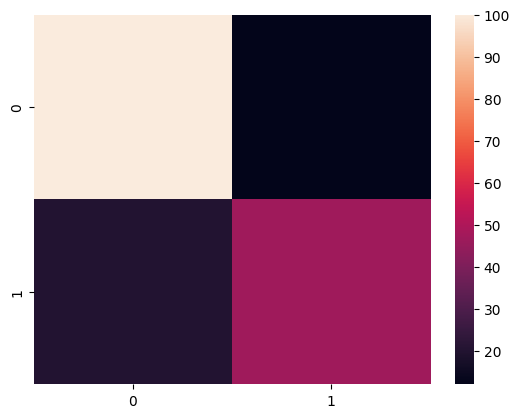

In [373]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
sns.heatmap(conf_mat)

In [374]:
new_df.describe()

,Age,Fare,Survived
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,0.383838
std,14.526497,49.693429,0.486592
min,0.420000,0.000000,0.000000
25%,20.125000,7.910400,0.000000
50%,28.000000,14.454200,0.000000
75%,38.000000,31.000000,1.000000
max,80.000000,512.329200,1.000000
